# Biophysics degeneracy

[The previous notebook](./02_biophysics.ipynb) introduced convenient methods to run predefined stimulus protocols, given some set of biphysical parameters. Here, we will explore these bipohysical parameters, and the effect they have on the cell's output.

In [1]:
import Interface as I
from getting_started import getting_started_dir
db_path = I.os.path.join(getting_started_dir, 'example_data', 'simulation_data', 'biophysics')
db = I.DataBase(db_path)
example_models = db['example_models']  # Load example biophysical models
%matplotlib inline

[INFO] ISF: Current version: heads/publish+0.g1a7fa8d5.dirty
[INFO] ISF: Current pid: 40126
trying to connect to distributed locking server {'config': {'hosts': 'somalogin02-hs:33333'}, 'type': 'zookeeper'}
success!


--No graphics will be displayed.


[WARNING] warnings: /gpfs/soma_fs/scratch/meulemeester/anaconda_isf3.8/lib/python3.8/site-packages/pandas_msgpack-0.1.4+14.gfcb0471.dirty-py3.8-linux-x86_64.egg/pandas_msgpack/packers.py:78: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import (Timestamp, Period, Series, DataFrame,  # noqa

[INFO] mechanisms: Loading mechanisms:
[WARNING] warnings: /gpfs/soma_fs/scratch/meulemeester/project_src/in_silico_framework/Interface.py:219: UserWarning:

The source folder has uncommited changes!





[INFO] ISF: Loaded modules with __version__ attribute are:
IPython: 8.12.3, Interface: heads/publish+0.g1a7fa8d5.dirty, PIL: 8.2.0, _csv: 1.0, _ctypes: 1.1.0, _curses: b'2.2', _decimal: 1.70, argparse: 1.1, attr: 20.3.0, backcall: 0.2.0, blake3: 0.3.3, blosc: 1.10.2, bluepyopt: 1.9.126, bottleneck: 1.3.2, cffi: 1.14.3, click: 7.1.2, cloudpickle: 1.6.0, colorama: 0.4.4, comm: 0.2.1, csv: 1.0, ct

In [2]:
example_models

,1BAC_APheight,1BAC_ISI,1BAC_ahpdepth,1BAC_caSpike_height,1BAC_caSpike_width,1BAC_spikecount,2BAC_APheight,2BAC_ISI,2BAC_ahpdepth,2BAC_caSpike_height,...,gen,hot_zone.outsidescale_sections,BAC.hay_measure.recSite,BAC.stim.dist,bAP.hay_measure.recSite1,bAP.hay_measure.recSite2,hot_zone.min_,hot_zone.max_,morphology.filename,sort_column
559,0.860674,2.378772,0.313470,0.052148,1.098425,0.0,1.070249,0.441470,0.354247,0.267721,...,35,"(23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 3...",294.820337,294.820337,294.820337,474.820337,384.820337,584.820337,89_L5_CDK20050712_nr6L5B_dend_PC_neuron_transf...,4.050041
40,0.850648,2.393448,0.322252,0.045527,1.118110,0.0,0.978449,1.131267,0.412842,0.212028,...,36,"(23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 3...",294.820337,294.820337,294.820337,474.820337,384.820337,584.820337,89_L5_CDK20050712_nr6L5B_dend_PC_neuron_transf...,4.050041
485,0.851402,2.525537,0.330870,0.290714,1.472441,0.0,1.026520,1.116590,0.377576,0.040474,...,36,"(23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 3...",294.820337,294.820337,294.820337,474.820337,384.820337,584.820337,89_L5_CDK20050712_nr6L5B_dend_PC_neuron_transf...,4.050041
470,0.839281,2.540214,0.331027,0.295573,1.511811,0.0,1.037798,1.131267,0.375546,0.029042,...,38,"(23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 3...",294.820337,294.820337,294.820337,474.820337,384.820337,584.820337,89_L5_CDK20050712_nr6L5B_dend_PC_neuron_transf...,4.050041
738,0.835922,2.554890,0.334502,0.311170,1.472441,0.0,0.999727,1.219326,0.385494,0.016952,...,39,"(23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 3...",294.820337,294.820337,294.820337,474.820337,384.820337,584.820337,89_L5_CDK20050712_nr6L5B_dend_PC_neuron_transf...,4.050041


In [3]:
biophysical_parameter_names = [c for c in example_models.columns if 'ephys' in c or c == "scale_apical.scale"]
biophysical_parameter_names

['ephys.CaDynamics_E2_v2.apic.decay',
 'ephys.CaDynamics_E2_v2.apic.gamma',
 'ephys.CaDynamics_E2_v2.axon.decay',
 'ephys.CaDynamics_E2_v2.axon.gamma',
 'ephys.CaDynamics_E2_v2.soma.decay',
 'ephys.CaDynamics_E2_v2.soma.gamma',
 'ephys.Ca_HVA.apic.gCa_HVAbar',
 'ephys.Ca_HVA.axon.gCa_HVAbar',
 'ephys.Ca_HVA.soma.gCa_HVAbar',
 'ephys.Ca_LVAst.apic.gCa_LVAstbar',
 'ephys.Ca_LVAst.axon.gCa_LVAstbar',
 'ephys.Ca_LVAst.soma.gCa_LVAstbar',
 'ephys.Im.apic.gImbar',
 'ephys.K_Pst.axon.gK_Pstbar',
 'ephys.K_Pst.soma.gK_Pstbar',
 'ephys.K_Tst.axon.gK_Tstbar',
 'ephys.K_Tst.soma.gK_Tstbar',
 'ephys.NaTa_t.apic.gNaTa_tbar',
 'ephys.NaTa_t.axon.gNaTa_tbar',
 'ephys.NaTa_t.soma.gNaTa_tbar',
 'ephys.Nap_Et2.axon.gNap_Et2bar',
 'ephys.Nap_Et2.soma.gNap_Et2bar',
 'ephys.SK_E2.apic.gSK_E2bar',
 'ephys.SK_E2.axon.gSK_E2bar',
 'ephys.SK_E2.soma.gSK_E2bar',
 'ephys.SKv3_1.apic.gSKv3_1bar',
 'ephys.SKv3_1.apic.offset',
 'ephys.SKv3_1.apic.slope',
 'ephys.SKv3_1.axon.gSKv3_1bar',
 'ephys.SKv3_1.soma.gSKv3_1b

## What happens if we adapt the biophysical parameters?

In [4]:
p = example_models.iloc[1][biophysical_parameter_names]  # let's take a different model compared to previous notebook

What would happen if we kept increasing the density of sodium at the soma?

In [5]:
varying_na = []
original_na = p[biophysical_parameter_names]['ephys.NaTa_t.soma.gNaTa_tbar']
for na_scale in I.np.logspace(-1, 1, num=40, base=2):
    adapted_param = p[biophysical_parameter_names].copy()
    adapted_param['ephys.NaTa_t.soma.gNaTa_tbar'] = original_na.copy() * na_scale
    varying_na.append(adapted_param)

In the previous notebook, we created a [`Simulator`](../../../biophysics_fitting/simulator.py) and [`Evaluator`](../biophysics_fitting/evaluator.py) object. Since they are morphology-specific, and we're running simulations on the same morphology, we can simply re-use these objects in this tutorial.

In [6]:
simulator = db['simulator']

In [7]:
client = I.get_client()
delayeds = [I.dask.delayed(simulator.run)(p, 'bAP') for p in varying_na]
f = client.compute(delayeds)

In [8]:
# voltage responses when injecting bAP stimulus protocol
bAP_responses = [f_.result()['bAP.hay_measure'] for f_ in f]

In [9]:
def find_index_closest(array, value):
    ind = I.np.where(I.np.diff(I.np.sign(array - value)))[0][0]
    return ind

Text(0, 0.5, 'Scaling $NaTa_t$ (soma)')

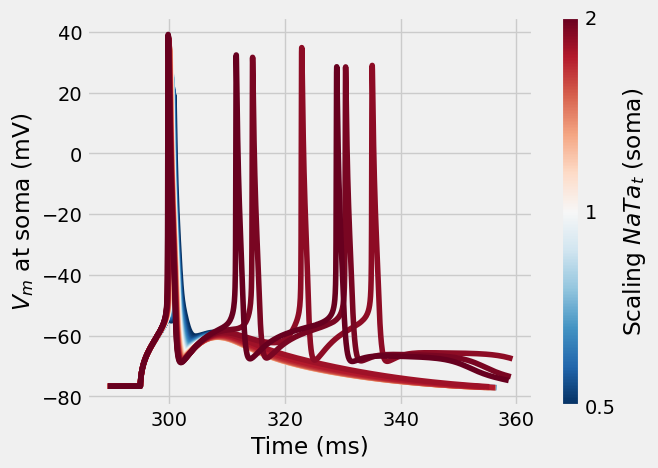

In [10]:
from matplotlib import cm, colors
I.plt.style.use("fivethirtyeight")
sodiums = [e['ephys.NaTa_t.soma.gNaTa_tbar'] for e in varying_na]
norm = colors.LogNorm(vmax=sodiums[-1], vmin=sodiums[0])
cbar = cm.ScalarMappable(norm=norm, cmap=cm.RdBu_r)

t_min, t_max = 294, 360
fig, ax = I.plt.subplots()
for response, param in zip(bAP_responses, varying_na):
    start, stop = find_index_closest(response['tVec'], t_min), find_index_closest(response['tVec'], t_max)
    ax.plot(
        response['tVec'][start:stop], 
        response['vList'][0][start:stop], 
        c=cbar.to_rgba(param['ephys.NaTa_t.soma.gNaTa_tbar']))
ax.set_xlabel("Time (ms)")
ax.set_ylabel("$V_m$ at soma (mV)")

colorbar = I.plt.colorbar(
    cbar, 
    ticks=[sodiums[0], original_na, sodiums[-1]])
colorbar.minorticks_off()
colorbar.set_ticklabels(('0.5', '1', '2'))
colorbar.ax.set_ylabel("Scaling $NaTa_t$ (soma)")

We see how increasing (decreasing) the density of $NaTa_t$ channels at the soma:
- makes the AHP depth deeper (more shallow)
- makes the AP height higher (lower)
- Makes the cell start burst firing after a while

In [11]:
from biophysics_fitting.hay_complete_default_setup import get_hay_problem_description

obj = get_hay_problem_description()
AP_obj = obj[obj['feature'] == 'AP_height'].iloc[0]
m_ap, std_ap = AP_obj['mean'], AP_obj['std']

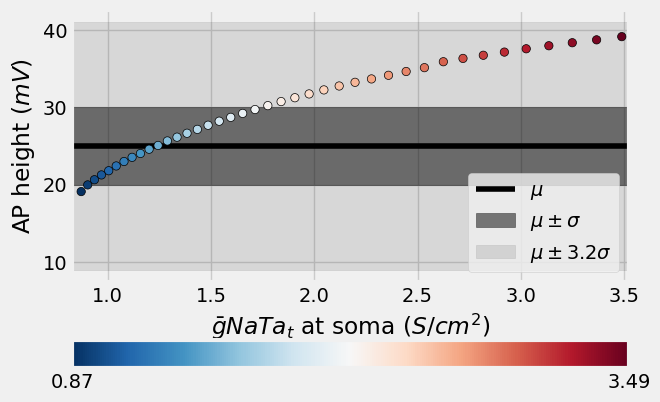

In [12]:
ax = I.plt.scatter(
    sodiums,
    [I.np.max(r['vList']) for r in bAP_responses],
    c=cbar.to_rgba(sodiums),
    zorder=2,
    linewidth=.5,
    edgecolors='k'
)
I.plt.xlabel("$\\bar{g}NaTa_t$ at soma ($S/cm^2$)")
I.plt.ylabel("AP height ($mV$)")

# plot average AP height and std

I.plt.fill_between(
    (0, 4),
    m_ap - std_ap,
    m_ap+std_ap, 
    zorder=1, color='k', alpha=.5, label="$\mu \pm \sigma$")
I.plt.fill_between(
    (0, 4),
    m_ap - 3.2*std_ap,
    m_ap+3.2*std_ap, 
    zorder=1, color='k', alpha=.1, label="$\mu \pm 3.2\sigma$")
I.plt.axhline(m_ap, color='k', zorder=1, label="$\mu$")
I.plt.xlim(min(sodiums)*.95, max(sodiums)*1.01)
I.plt.legend(loc='lower right')

# colorbar
colorbar = I.plt.colorbar(
    cbar, 
    ticks=[sodiums[0], sodiums[-1]],
    orientation="horizontal")
colorbar.minorticks_off()
colorbar.set_ticklabels((round(min(sodiums), 2), round(max(sodiums), 2)))

Rather unsurprisingly, there is a relationship between the density of sodium channels at the soma and the AP height.

As far as the AP height is concerned, all models are well within the $3.2\sigma$ bound. Of course, AP height is not the only objective a model needs to adhere to in order to be considered "biologically plausible". There are many objectives a good biphysical model needs to adhere to, for $5$ different stimulus protocols:

In [13]:
obj

,feature,mean,objective,std,stim_name,stim_type
0,Spikecount,1.0000,bAP_spikecount,0.0100,bAP,bAP
1,AP_height,25.0000,bAP_APheight,5.0000,bAP,bAP
2,AP_width,2.0000,bAP_APwidth,0.5000,bAP,bAP
3,BPAPatt2,45.0000,bAP_att2,10.0000,bAP,bAP
4,BPAPatt3,36.0000,bAP_att3,9.3300,bAP,bAP
5,AHP_depth_abs,-65.0000,BAC_ahpdepth,4.0000,BAC,BAC
6,AP_height,25.0000,BAC_APheight,5.0000,BAC,BAC
7,BAC_ISI,9.9010,BAC_ISI,0.8517,BAC,BAC
8,BAC_caSpike_height,6.7300,BAC_caSpike_height,2.5400,BAC,BAC
9,BAC_caSpike_width,37.4300,BAC_caSpike_width,1.2700,BAC,BAC


As we have seen before, the models with very high $\bar{g}NaTa_t$ may still be within bounds for AP height, but they start burst firing when they shouldn't. How do we check all $40$ objectives at once, rather than one at a time? With the [Evaluator](../../../biophysics_fitting/evaluator.py) of course!

## Exploring viable biophysical models

Given a bipohysical model that performs well on all objectives, it is possible to continuously make variations on the biophysical parameters, while monitoring how well it performs on pre-defined benchmarks (in this case, the ones described above).

This is conveniently packaged in [`biophysics_fitting.exploration_from_seedpoint`](../../../biophysics_fitting/exploration_from_seedpoint/__init__.py).

> ℹ️ **If you don't have a seedpoint yet**, we recommend running a Multi-Objective Optimization Algorithm first, e.g. the evolutionary algorithm [BluePyOpt](https://github.com/BlueBrain/BluePyOpt) (see [`MOEA_EH_minimal`](../../../biophysics_fitting/MOEA_EH_minimal) for configuration files for an L5PT).

In the preivous notebook, we used an Evaluator object that took an entire voltage trace as input. This is memory-inefficient, and slows down the process of finding good models a lot. This time around, we will not keep track of the entire voltage trace, but only the corresponding metrics that we use to quantify them. Note the difference in the two modules that provide Evaluators:
- [hay_complete_default_setup](../../../biophysics_fitting.hay_complete_default_setup.py)
- [hay_complete_default_setup_python](../../../biophysics_fitting.hay_complete_default_setup_python.py)

In [14]:
from biophysics_fitting.hay_complete_default_setup_python import get_Evaluator

evaluator = get_Evaluator(step=False)
biophysical_parameter_ranges = db['89']['params']

In [15]:
if not I.os.path.exists(I.os.path.join(db.basedir, 'RW_exploration_example')):
    db.create_managed_folder('RW_exploration_example')

[WARNING] isf_data_base: The database source folder has uncommitted changes!


In [16]:
from biophysics_fitting.exploration_from_seedpoint.RW import RW
from biophysics_fitting.exploration_from_seedpoint.utils import evaluation_function_incremental_helper
from biophysics_fitting.hay_evaluation import hay_evaluate_bAP, hay_evaluate_BAC

evaluation_function = I.partial(
    evaluation_function_incremental_helper,
    s=simulator,
    e=evaluator,
    stim_order=['bAP', 'BAC']
)

rw = RW(
    param_ranges=biophysical_parameter_ranges,
    df_seeds=example_models[biophysical_parameter_names],
    evaluation_function=evaluation_function,
    MAIN_DIRECTORY=db['RW_exploration_example'],
    min_step_size=0.02,
    max_step_size=0.02,
    checkpoint_every=10)

Let's run this for 60 seconds and see what happens. You can always restart the exploration and it will pick up from where it left off. Note that by default, it only writes out models every 10 models it has found. I fyou haven't found at least 10 models after $60$ seconds, you may want to increase computational power, or the `snooziness` parameter.

In [24]:
snooziness = 60  # in seconds

from time import sleep
from threading import Thread
import multiprocessing

proc = multiprocessing.Process(
    target=rw.run_RW, 
    kwargs={
        'selected_seedpoint': 0,
        'particle_id': 0,
        'seed': 42  # for numpy random seed
    })
proc.start()
sleep(snooziness)
proc.terminate()  # sends a SIGTERM
proc.join()

35
My random number generator seed is 42
I am particle 0 and I write to /gpfs/soma_fs/scratch/meulemeester/project_src/in_silico_framework/getting_started/example_data/simulation_data/biophysics/RW_exploration_example/0/0
So far nothing simulated, start from seedpoint 0
evaluating stimulus bAP
evaluating stimulus BAC
all stimuli successful!
exploration loop
New loop. Current iteration 0
Get new position
Position within boundaries found, step size is 0.02 Tested  3 positions to find one inside the box.
evaluating stimulus bAP
evaluating stimulus BAC
all stimuli successful!
Inside the space? True
Moving current position to proposed position
distance to initial seed point (normalized): 0.02000000000000001
New loop. Current iteration 1
Get new position
Position within boundaries found, step size is 0.02 Tested  1 positions to find one inside the box.
evaluating stimulus bAP
evaluating stimulus BAC
all stimuli successful!
Inside the space? True
Moving current position to proposed position
d

In [25]:
from biophysics_fitting.exploration_from_seedpoint.RW_analysis import Load

outdir = db['RW_exploration_example'].join('0')
l = Load(
    I.get_client(),
    outdir,
    n_particles = 1)

In [27]:
explored_models = l.get_df().compute()
print("Explored {} new models".format(len(explored_models)))

Explored 21 new models


How much did the exploration actually explore? Let's plot out how much it deviated from it's starting point, relative to the total extent of parameter limits we allowed for

In [28]:
def normalize(df, mn, mx):
    return (df - mn)/(mx-mn)
    
mn, mx = biophysical_parameter_ranges['min'], biophysical_parameter_ranges['max']
normalized_startpoint = normalize(example_models.iloc[0][biophysical_parameter_names], mn, mx)
normalized_explored_models = normalize(explored_models[biophysical_parameter_names], mn, mx)

# calc exploration relative to startpoint, in % of total allowed parameter limits
d = I.pd.concat([normalized_explored_models, I.pd.DataFrame(normalized_startpoint).T])
d -= normalized_startpoint
d[biophysical_parameter_names] *= 100
d = d.melt(var_name='Biophysical parameter', value_name='Normalized value (%)')

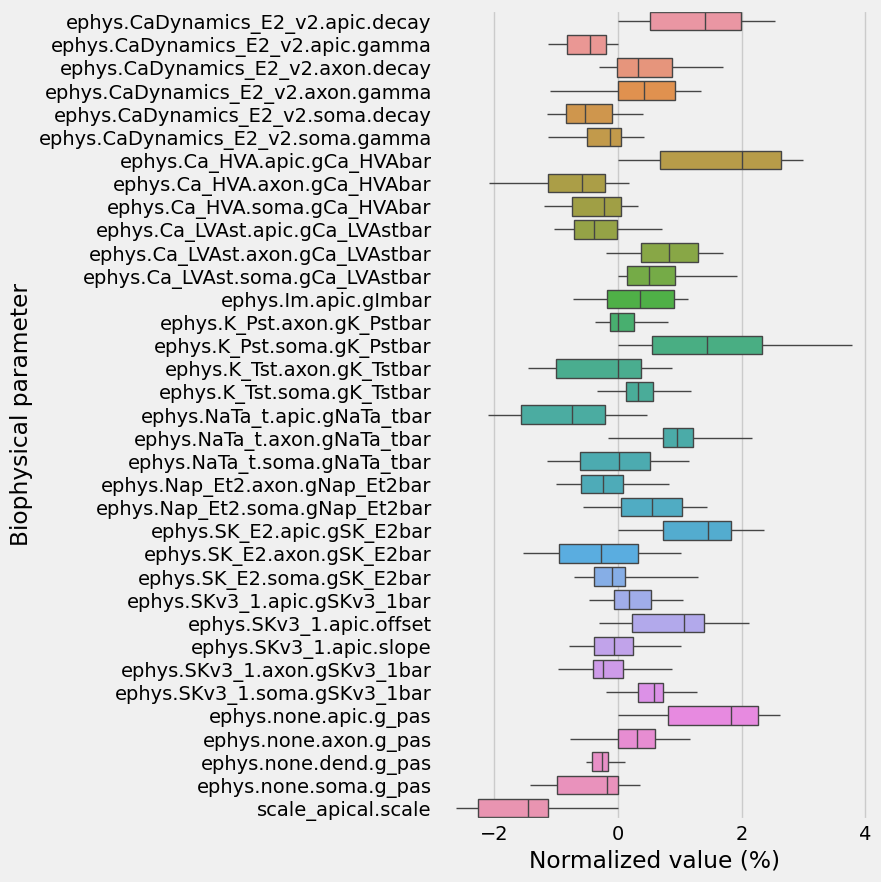

In [29]:
I.plt.figure(figsize=(5, 10))

ax = I.sns.boxplot(
    data=d,
    y='Biophysical parameter', x='Normalized value (%)',
    whis=100,
    linewidth=1,
    showcaps = False
   )

In [30]:
delayeds = [I.dask.delayed(
    simulator.run)(p, 'BAC') for _, p in explored_models[biophysical_parameter_names].iterrows()]
f = client.compute(delayeds)

In [31]:
responses = [f_.result() for f_ in f]
BAC_responses = [response['BAC.hay_measure'] for response in responses]

Text(0.5, 0.92, 'Dendritic $V_m$')

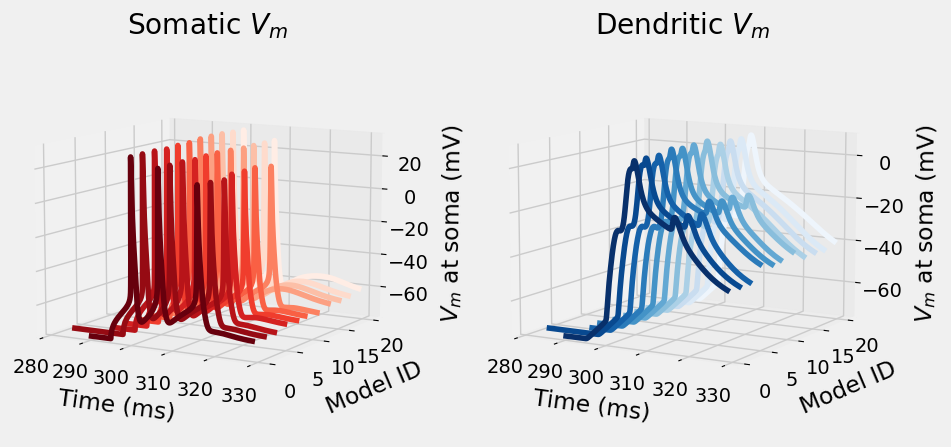

In [36]:
t_min, t_max = 290, 330
fig, (ax1, ax2) = I.plt.subplots(1, 2, subplot_kw={'projection': '3d'}, figsize=(10, 5))
Reds = I.plt.get_cmap("Reds_r")
Blues = I.plt.get_cmap("Blues_r")
every_other = 2  # plot out the voltage trace of every other 

i=0
for response, param in zip(BAC_responses[::every_other], explored_models[biophysical_parameter_names][::every_other]):
    start, stop = find_index_closest(response['tVec'], t_min), find_index_closest(response['tVec'], t_max)
    ax1.plot(
        response['tVec'][start:stop], 
        [i]*(stop-start),
        response['vList'][0][start:stop],
        zorder=-i,
        c=Reds(i/len(responses))
        )
    ax2.plot(
        response['tVec'][start:stop], 
        [i]*(stop-start),
        response['vList'][1][start:stop],
        zorder=-i,
        c=Blues(i/len(responses))
        )
    i+=every_other

for ax_ in (ax1, ax2):
    ax_.set_xlabel("Time (ms)", labelpad=10)
    ax_.set_ylabel("Model ID", labelpad=10)
    ax_.set_zlabel("$V_m$ at soma (mV)", labelpad=10)
    ax_.view_init(elev=10, azim=300)
ax1.set_title("Somatic $V_m$")
ax2.set_title("Dendritic $V_m$")